## Assessment 1 23729589

In [1]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

In [2]:
A05B24 = pd.read_csv('A0.5B24.csv',names=['Time','A'])
A1B24 = pd.read_csv('A1B24.csv',names=['Time','A'])
A2B24 = pd.read_csv('A2B24.csv',names=['Time','A'])
A4B24 = pd.read_csv('A4B24.csv',names=['Time','A'])
A8B24 = pd.read_csv('A8B24.csv',names=['Time','A'])
A0B0= pd.read_csv('A0B0.csv',names=['Time','A'])
A8B15= pd.read_csv('A8B1.5.csv',names=['Time','B'])
A8B12= pd.read_csv('A8B12.csv',names=['Time','B'])
A8B3= pd.read_csv('A8B3.csv',names=['Time','B'])
A8B6= pd.read_csv('A8B6.csv',names=['Time','B'])
A8B24B = pd.read_csv('A8B24.csv',names=['Time','B'])

In [3]:
def v(vf,a,b,ka,kb):
    return vf*a*b/((ka+a)*(kb+b))

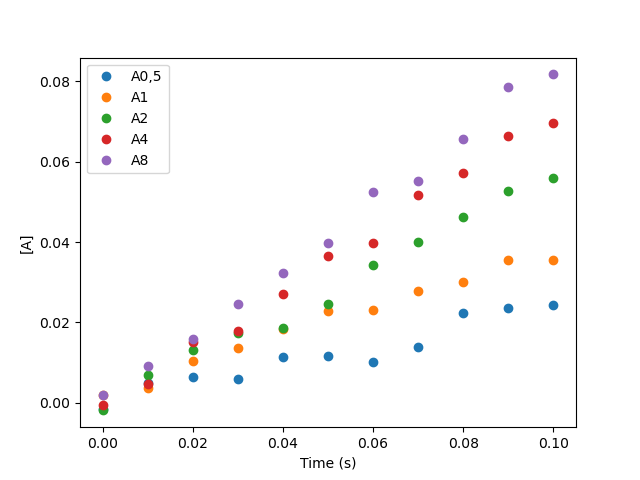

In [4]:
fig, ax = plt.subplots()
ax.plot(A05B24.Time, A05B24.A,'o', label='A0,5')
ax.plot(A1B24.Time, A1B24.A,'o', label='A1')
ax.plot(A2B24.Time, A2B24.A,'o', label='A2')
ax.plot(A4B24.Time, A4B24.A,'o', label='A4')
ax.plot(A8B24.Time, A8B24.A,'o', label='A8')
ax.set_xlabel('Time (s)')
ax.set_ylabel('[A]')
ax.legend(loc='best')

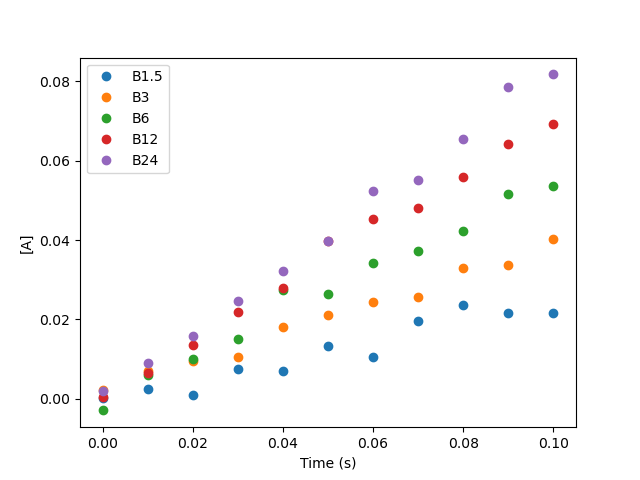

In [5]:
fig, ax = plt.subplots()
ax.plot(A8B15.Time, A8B15.B,'o', label='B1.5')
ax.plot(A8B3.Time, A8B3.B,'o', label='B3')
ax.plot(A8B6.Time, A8B6.B,'o', label='B6')
ax.plot(A8B12.Time, A8B12.B, 'o',label='B12')
ax.plot(A8B24B.Time, A8B24B.B, 'o',label='B24')
ax.set_xlabel('Time (s)')
ax.set_ylabel('[A]')
ax.legend(loc='best')

In [6]:
regA05B24 = sp.stats.linregress(A05B24)
regA1B24 = sp.stats.linregress(A1B24)
regA2B24 = sp.stats.linregress(A2B24)
regA4B24 = sp.stats.linregress(A4B24)
regA8B24 = sp.stats.linregress(A8B24)
regA8B15 = sp.stats.linregress(A8B15)
regA8B12 = sp.stats.linregress(A8B12)
regA8B3  = sp.stats.linregress(A8B3)
regA8B6  = sp.stats.linregress(A8B6)
regA8B24B  = sp.stats.linregress(A8B24B)


In [7]:
regressions = [regA05B24, regA1B24, regA2B24, regA4B24, regA8B24, regA8B15, regA8B12, regA8B3, regA8B6, regA8B24B]
rates = []
for reg in regressions:
    print (reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143
0.25422083243133853
0.7012039804663761
0.3679535702854621
0.556408829374724
0.8250788434733143


In [8]:
# combine data
A05B24['A'] = 0
A1B24['A'] = 0
A2B24['A'] = 0
A4B24['A'] = 0
A8B24['A'] = 0
A8B15['B'] = 0
A8B3['B'] = 0
A8B6['B'] = 0
A8B12['B'] = 0
A8B24B['B'] = 0

df3=pd.concat([A05B24,A1B24,A2B24,A4B24,A8B24,A8B15,A8B3,A8B6,A8B12,A8B24])

In [9]:
a = np.array([0,0.5,1.0,2.0,4.0,8.0,8.0,8.0,8.0,8.0])
b = np.array([0,24,24,24,24,24,1.5,3,6,12])
rates1 = np.array([0,0.512,0.816,1.202,1.561,1.747,0.603,0.9121,1.267,1.558])

In [10]:
data = np.column_stack((a, b))

df = pd.DataFrame(data, columns=['a', 'b'])
df['rates'] = rates

# Print the resulting DataFrame
print(df)

     a     b     rates
0  0.0   0.0  0.241187
1  0.5  24.0  0.352630
2  1.0  24.0  0.574650
3  2.0  24.0  0.732286
4  4.0  24.0  0.825079
5  8.0  24.0  0.254221
6  8.0   1.5  0.701204
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.825079


In [11]:
#using lmfit
from lmfit import Model
mymod = Model(v, independent_vars=['a', 'b'])
mypar  = mymod.make_params(vf=1, ka=1, kb=1)

In [12]:
myfit = mymod.fit(df.rates, mypar, a=df.a, b=df.b)

In [13]:
myfit

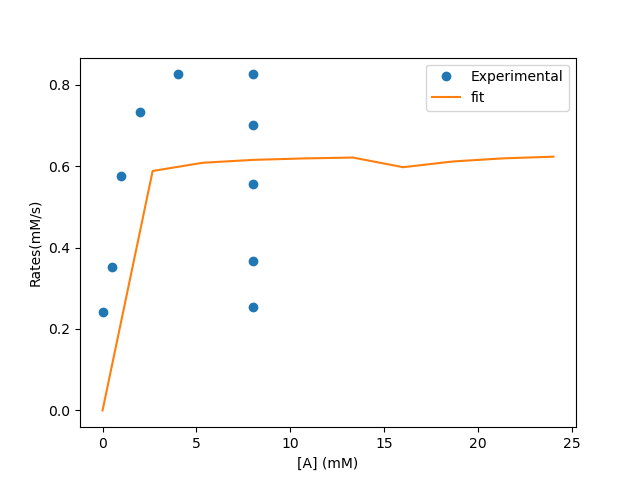

In [14]:
avals = np.linspace(0,24,10)
fig, ax = plt.subplots()
ax.plot(a, rates,'o', label='Experimental') # experimental data  #'o' makes it data points not line.
ax.plot(avals, myfit.eval(a=avals), label='fit') # fitted model
ax.set_xlabel('[A] (mM)')
ax.set_ylabel('Rates(mM/s)')
ax.legend(loc='best')

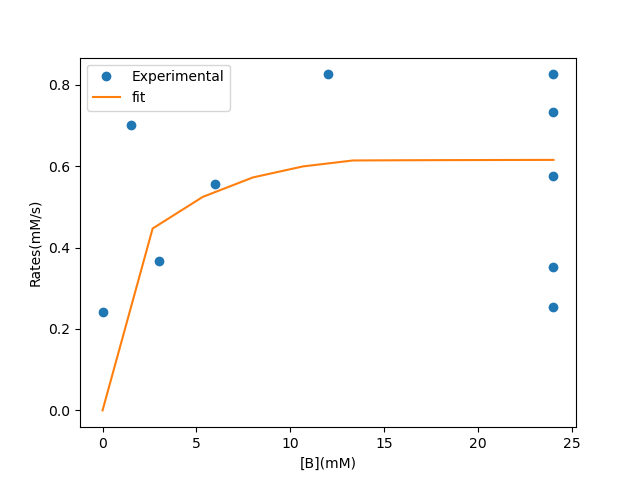

In [15]:
bvals = np.linspace(0,24,10)
fig, ax = plt.subplots()
ax.plot(b, rates,'o', label='Experimental') # experimental data  #'o' makes it data points not line.
ax.plot(bvals, myfit.eval(b=bvals), label='fit') # fitted model
ax.set_xlabel('[B](mM)')
ax.set_ylabel('Rates(mM/s)')
ax.legend(loc='best')